In [2]:
from main_utils import *

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#############################################################
## SET UP 

M_S = 64
L_S = 16
S = Net(M=M_S, L=L_S) 
print('Single Deep Parameters: ', S.parameters)

# Here are the frequent values in literature
L_ = [4, 8, 16, 32, 64]
M_ = [4, 8, 16, 32, 64]
K_ = [4, 8, 16, 32, 64]

Single Deep Parameters:  644170


In [5]:
# Check all those models have in fact the correct parameters
import pandas as pd
#candidates = pd.DataFrame(columns=['K','Le','Me','Score'])
def score(S,E,K):
    return round( (K * Ek.parameters) / S.parameters, 3)

candidates = list()
for K in K_:
    for Le in L_:
        Me = getM_L(S,K,Le)  
        Ek = Net(Me, Le)
        candidates.append({'K':K, 'Le':Le, 'Me':Me, 'Ek': Ek.parameters, 'Score': score(S,Ek,K), 'Net':Ek})
    
candidates = pd.DataFrame(candidates, columns=['K','Le','Me','Score','Net'])      
candidates.sort_values(by='Score', ascending=False, inplace=True)
candidates = candidates[candidates['Score'] > 0.9]

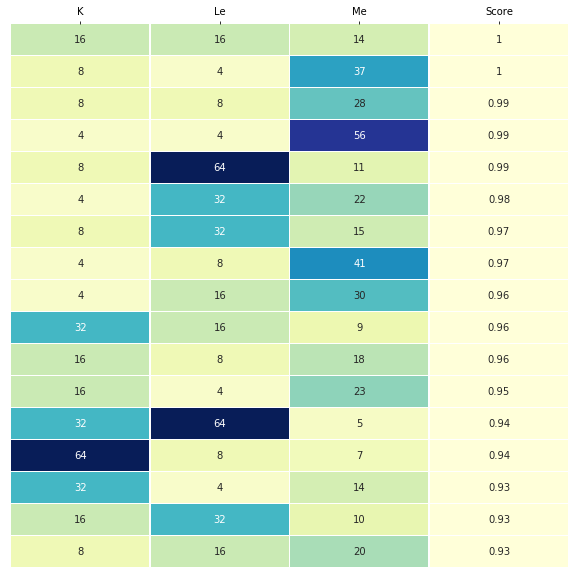

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(candidates[['K', 'Le', 'Me', 'Score']], 
            yticklabels=False, linewidths=.5, annot=True, cbar=False, cmap="YlGnBu", ax=ax)
ax.xaxis.set_ticks_position('top')

In [7]:
## Experiment 1 -- Given a single deep network, sweep all values of L and K, calculate M

M_range, L_range, K_range = max(M_), max(L_), max(K_)
KLM = np.zeros((L_range, L_range))
KLNumParam = np.zeros((L_range, L_range))
KLNumParamNorm = np.zeros((L_range, L_range))

for K in range(1,K_range):
    for L in range(1,K_range):
        
        # Given K,L, and the deep network, compute M
        KLM[K,L] = getM_L(S,K,L) 
        
        # Compute total number of parameters in the ensemble
        temp_net = Net(M = KLM[K,L], L = L)
        KLNumParam[K,L] = K*temp_net.total()
        
        # Exception when M cannot be computed
        if KLM[K,L] == -1:
            KLNumParam[K,L] = 0

# Normalize KLNumParam
KLNumParamNorm = KLNumParam/np.max(KLNumParam)

[]

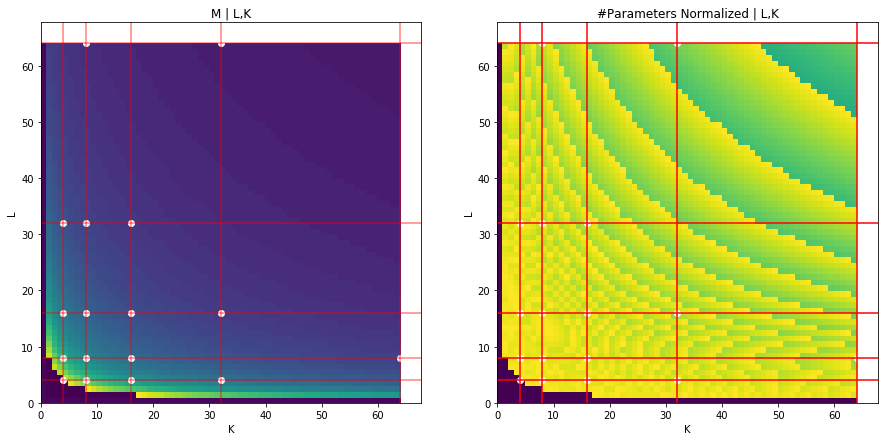

In [28]:
# Find potential candidates #####
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,7))

ax1.set(xlabel='K', ylabel='L', title='M | L,K')
ax1.pcolor(KLM)
[ax1.axvline(k, color='red', alpha=0.5) for k in K_]
[ax1.axhline(l, color='red', alpha=0.5) for l in L_]
ax1.scatter(x=candidates['K'], y=candidates['Le'], color='white', zorder=1)

ax2.set(xlabel='K', ylabel='L', title='#Parameters Normalized | L,K')
ax2.pcolor(KLNumParamNorm)
[ax2.axvline(k, color='red') for k in K_]
[ax2.axhline(l, color='red') for l in L_]
ax2.scatter(x=candidates['K'], y=candidates['Le'], color='white', zorder=1)
ax2.plot()


NameError: name 'pl' is not defined